<a href="https://colab.research.google.com/github/AadityaChachra/Student-Mental-Health-Analysis-in-R/blob/main/Student_Mental_Health_Analysis_(Capstone_Project%C2%A0_%C2%A02).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
install.packages("plotly")
install.packages("ggplot2")
install.packages("reshape2")
install.packages("corrplot") # correlation matrix visualization
install.packages("dplyr")
install.packages("tidyr")
install.packages("gridExtra")
library(ggplot2) # grammar of graphics plotting
library(dplyr) # data manipulation
library(tidyr) # data tidying
library(reshape2) # data reshaping
library(plotly) # interactive plots
library(gridExtra) # for arranging multiple plots

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [46]:
# Data acquisition and cleaning

df <- read.csv('data.csv')
df <- df %>% select(-Timestamp)
colnames(df) <- c('Sex', 'Age', 'Course', 'Year', 'CGPA', 'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Specialist_Treatment')
# renaming columns

# Age Range: 18–24 years, with the highest frequency at 18–19 years.
# Year of Study: Year 1 has the highest representation, followed by Years 2–4.
# CGPA: Most students fall into the "3.00–3.49" range (≈50%), with fewer in "3.50–4.00" (≈40%) and minimal in lower brackets.
# Courses: Engineering, BCS, BIT, and Islamic Education are the most common.

df <- df %>%
  mutate(
    Depression = ifelse(Depression == 'Yes', 1, 0),
    Anxiety = ifelse(Anxiety == 'Yes', 1, 0),
    Panic_Attack = ifelse(Panic_Attack == 'Yes', 1, 0),
    Specialist_Treatment = ifelse(Specialist_Treatment == 'Yes', 1, 0)
  )


numeric_df <- df %>% select_if(is.numeric)

df <- df[!duplicated(df), ]
df$Age[is.na(df$Age)] <- 24
print(head(df))

     Sex Age            Course   Year        CGPA Marital_Status Depression
1 Female  18       Engineering year 1 3.00 - 3.49             No          1
2   Male  21 Islamic education year 2 3.00 - 3.49             No          0
3   Male  19               BIT Year 1 3.00 - 3.49             No          1
4 Female  22              Laws year 3 3.00 - 3.49            Yes          1
5   Male  23      Mathemathics year 4 3.00 - 3.49             No          0
6   Male  19       Engineering Year 2 3.50 - 4.00             No          0
  Anxiety Panic_Attack Specialist_Treatment
1       0            1                    0
2       1            0                    0
3       1            1                    0
4       0            0                    0
5       0            0                    0
6       0            1                    0


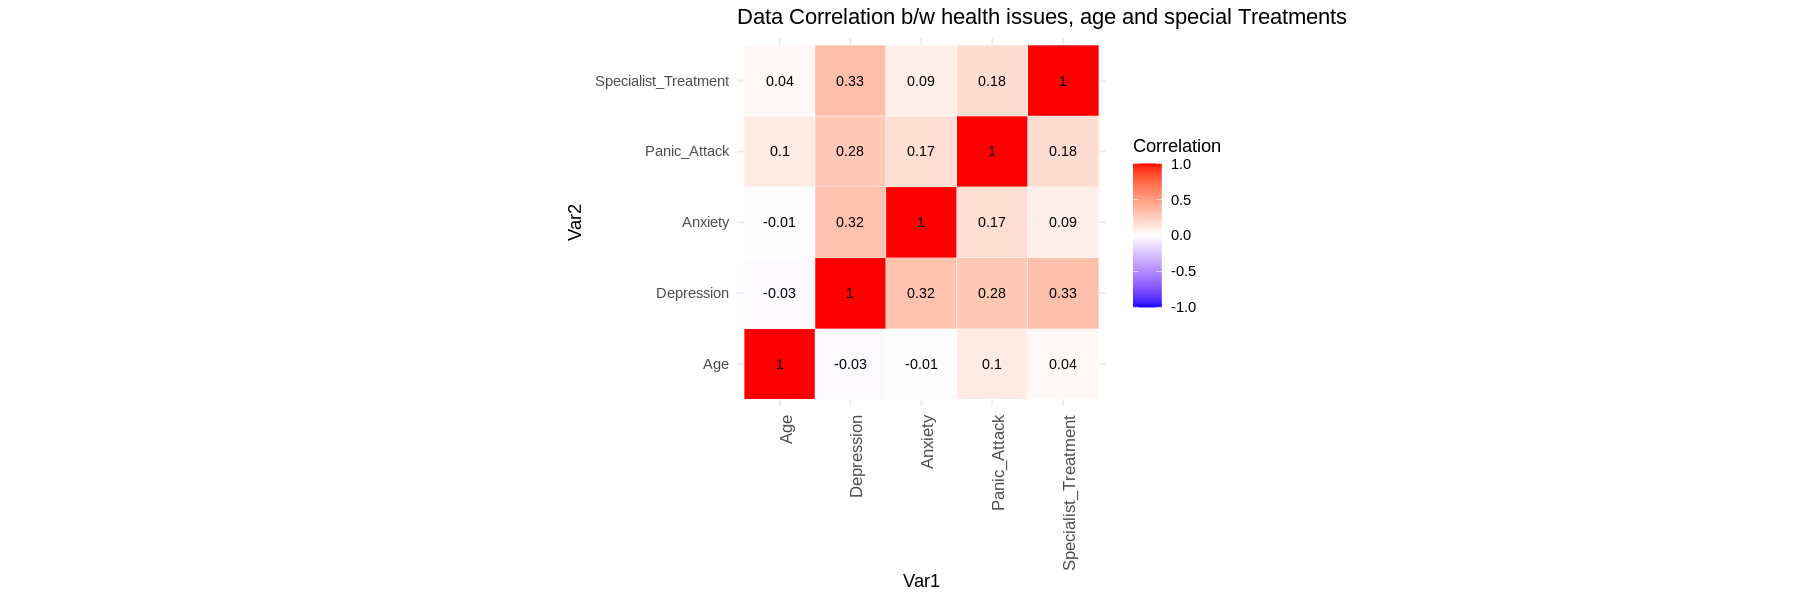

In [47]:
# Correlation Matrix between Mental health issues, Age and Specialist_Treatment

corr <- cor(numeric_df, use = "complete.obs")

ggplot(melt(corr), aes(Var1, Var2, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white",
                       midpoint = 0, limit = c(-1,1), space = "Lab",
                       name="Correlation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 1,
                                   size = 10, hjust = 1)) +
  coord_fixed() +
  geom_text(aes(label = round(value, 2)), color = "black", size = 3) +
  ggtitle("Data Correlation b/w health issues, age and special Treatments")


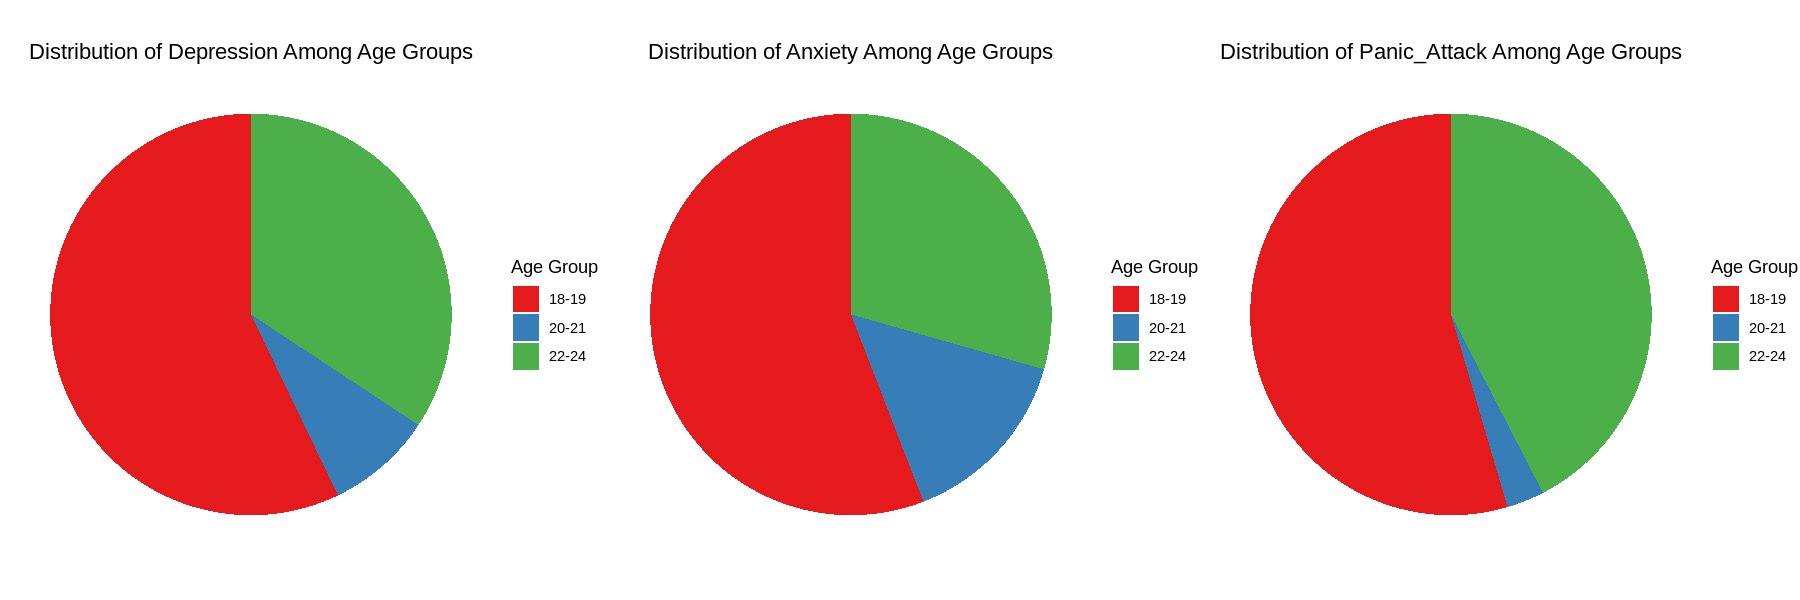

In [48]:
# Distribution of Mental Health Issues among students of different age groups
library(RColorBrewer) # for color palettes

bins <- c(18,20, 22, 25)
labels <- c('18-19', '20-21', '22-24')

df <- df %>%
  mutate(`Age Group` = cut(Age, breaks = bins, labels = labels, right = FALSE))

age_group_distribution <- df %>%
  group_by(`Age Group`) %>%
  summarise(
    Depression = sum(Depression, na.rm = TRUE),
    Anxiety = sum(Anxiety, na.rm = TRUE),
    Panic_Attack = sum(Panic_Attack, na.rm = TRUE)
  ) %>%
  replace_na(list(Depression = 0, Anxiety = 0, Panic_Attack = 0))


options(repr.plot.width = 15, repr.plot.height = 5)

conditions <- c("Depression", "Anxiety", "Panic_Attack")
plots <- list()

for (condition in conditions) {
  if (sum(age_group_distribution[[condition]]) == 0) {
    next
  }

  plot <- ggplot(age_group_distribution, aes(x = "", y = .data[[condition]], fill = `Age Group`)) +
    geom_bar(stat = "identity", width = 1) +
    coord_polar(theta = "y") +
    theme_void() +
    ggtitle(paste("Distribution of", condition, "Among Age Groups")) +
    theme(plot.title = element_text(hjust = 0.5)) +
    scale_fill_brewer(palette = "Set1")

  plots[[condition]] <- plot
}

do.call(grid.arrange, c(plots, ncol = 3))



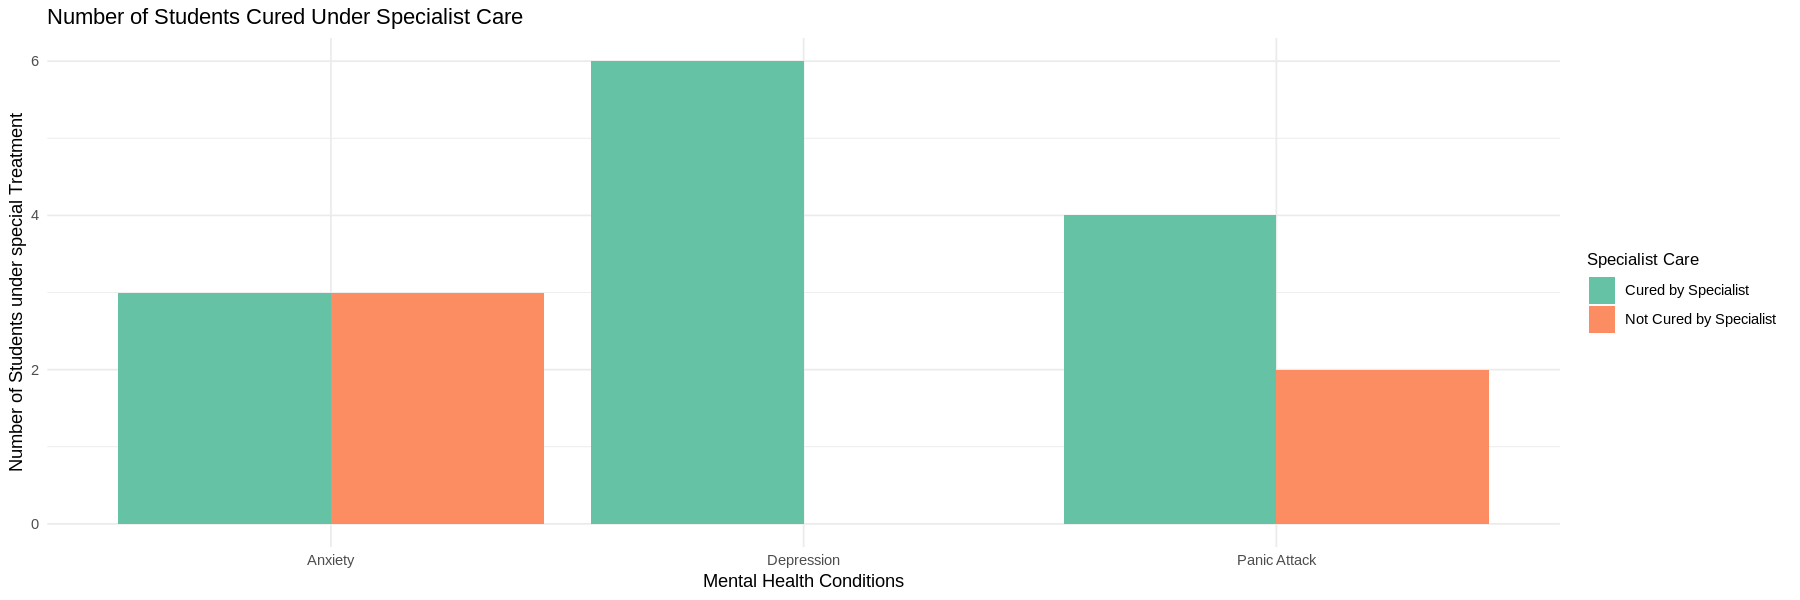

In [49]:
# Students with Mental health issues who have opted for Specialist_Treatment

depression_with_specialist <- sum((df$Depression == 1) & (df$Specialist_Treatment == 1))
depression_without_specialist <- sum((df$Depression == 0) & (df$Specialist_Treatment == 1))
anxiety_with_specialist <- sum((df$Anxiety == 1) & (df$Specialist_Treatment == 1))
anxiety_without_specialist <- sum((df$Anxiety == 0) & (df$Specialist_Treatment == 1))
panic_attack_with_specialist <- sum((df$Panic_Attack == 1) & (df$Specialist_Treatment == 1))
panic_attack_without_specialist <- sum((df$Panic_Attack == 0) & (df$Specialist_Treatment == 1))


plot_df <- data.frame(
  Condition = rep(c("Depression", "Anxiety", "Panic Attack"), each = 2),
  Specialist_Care = rep(c("Cured by Specialist", "Not Cured by Specialist"), 3),
  Count = c(depression_with_specialist, depression_without_specialist,
            anxiety_with_specialist, anxiety_without_specialist,
            panic_attack_with_specialist, panic_attack_without_specialist)
)

ggplot(plot_df, aes(x = Condition, y = Count, fill = Specialist_Care)) +
  geom_bar(stat = "identity", position = "dodge") +
  scale_fill_brewer(palette = "Set2") +
  ggtitle("Number of Students Cured Under Specialist Care") +
  xlab("Mental Health Conditions") +
  ylab("Number of Students under special Treatment") +
  theme_minimal() +
  theme(legend.title = element_text(size = 10)) +
  labs(fill = "Specialist Care")


In [50]:
# Data Inspection

head(df)

,Sex,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Specialist_Treatment,Age Group
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,Female,18,Engineering,year 1,3.00 - 3.49,No,1,0,1,0,18-19
2,Male,21,Islamic education,year 2,3.00 - 3.49,No,0,1,0,0,20-21
3,Male,19,BIT,Year 1,3.00 - 3.49,No,1,1,1,0,18-19
4,Female,22,Laws,year 3,3.00 - 3.49,Yes,1,0,0,0,22-24
5,Male,23,Mathemathics,year 4,3.00 - 3.49,No,0,0,0,0,22-24
6,Male,19,Engineering,Year 2,3.50 - 4.00,No,0,0,1,0,18-19


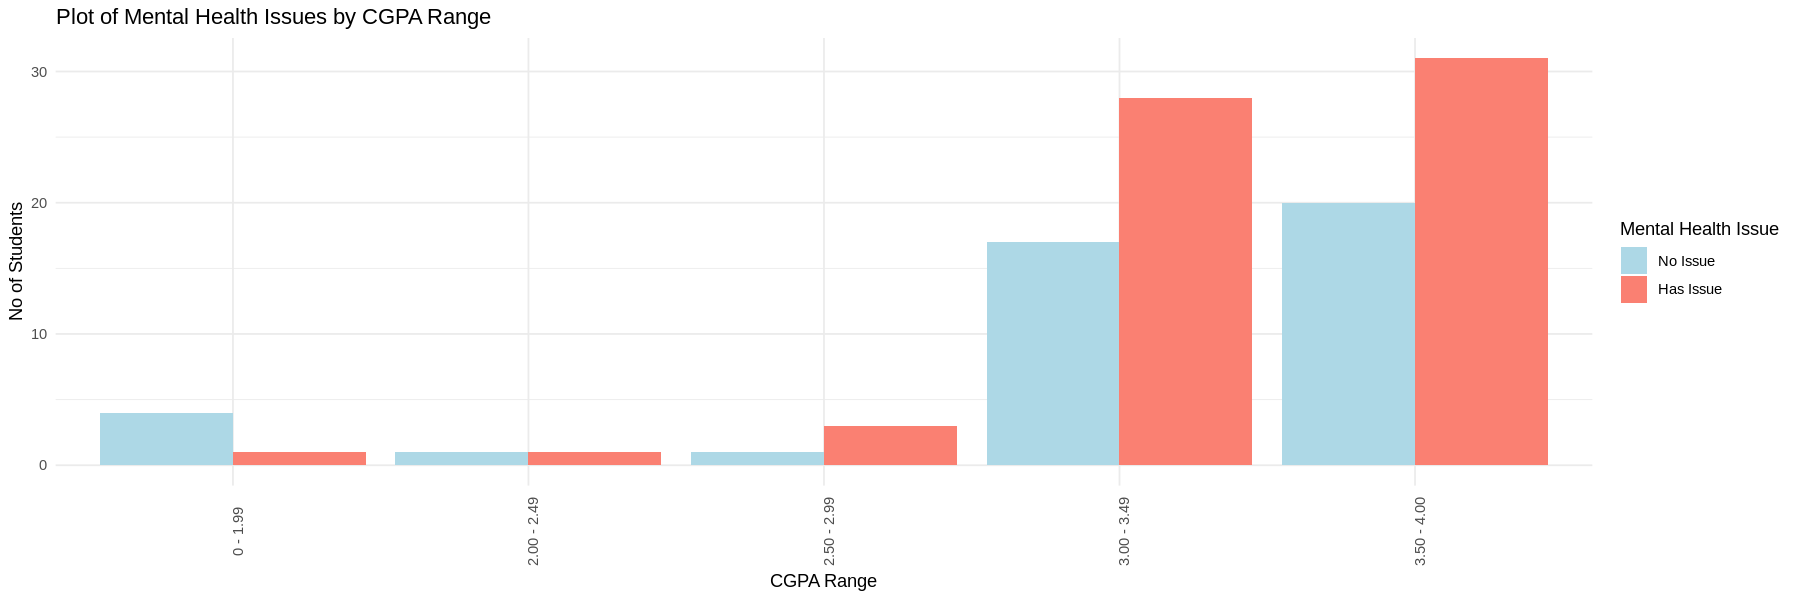

In [51]:
# Mental Health Issues v/s CGPA Range of students

df <- df %>%
  mutate(`Mental Health Issue` = ifelse((Depression + Anxiety + Panic_Attack) > 0, 1, 0))


ggplot(df, aes(x = factor(CGPA), fill = factor(`Mental Health Issue`))) +
  geom_bar(position = "dodge") +
  ggtitle("Plot of Mental Health Issues by CGPA Range") +
  xlab("CGPA Range") +
  ylab("No of Students") +
  scale_fill_manual(name = "Mental Health Issue",
                    values = c("0" = "lightblue", "1" = "salmon"),
                    labels = c("No Issue", "Has Issue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 1))


# A tibble: 5 × 3
  Course         No   Yes
  <chr>       <int> <int>
1 Engineering    11     7
2 BCS            14     5
3 BIT             5     5
4 BENL            0     2
5 psychology      1     2


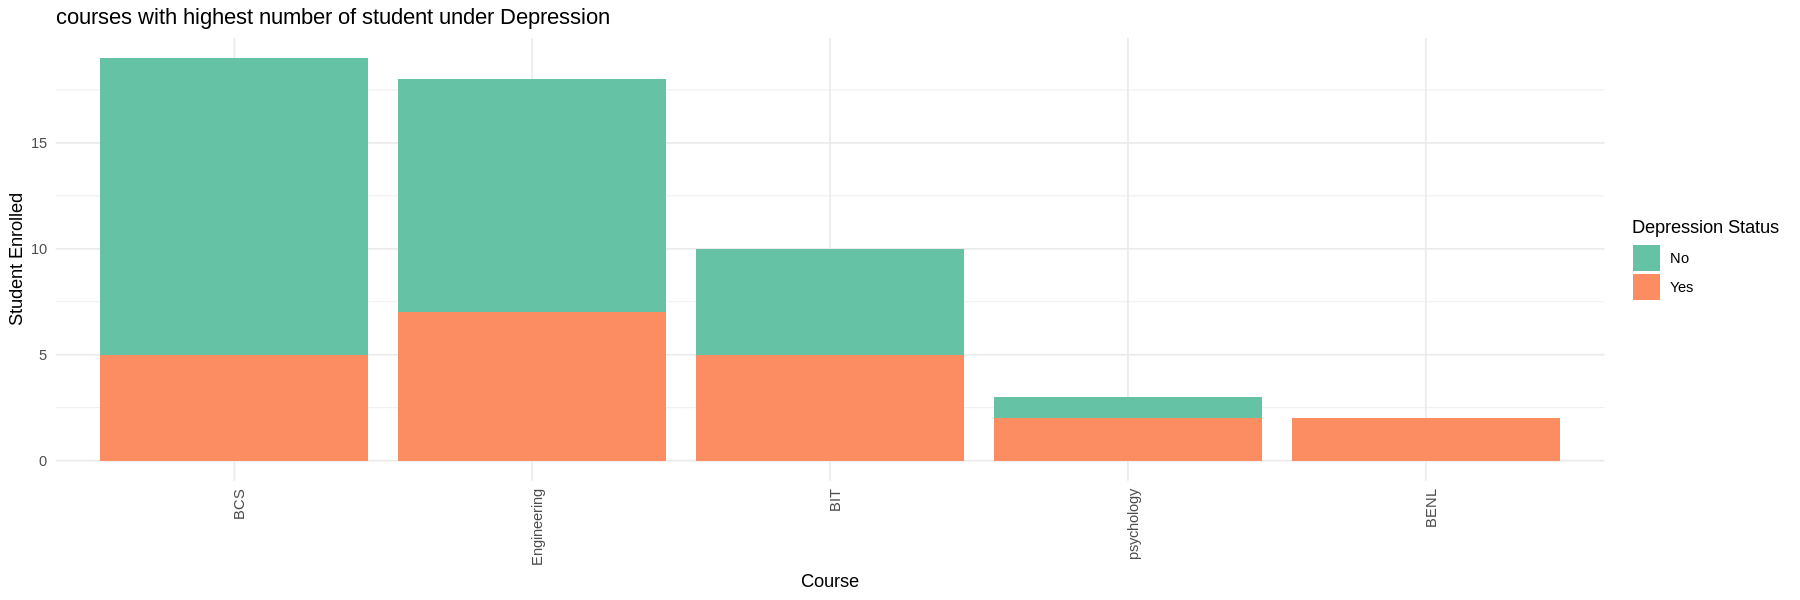

In [52]:
# Depression among students v/s the courses they are studying (Top 5 Courses)

data_depression <- df %>%
  group_by(Course) %>%
  summarise(No = sum(Depression == 0, na.rm = TRUE),
            Yes = sum(Depression == 1, na.rm = TRUE)) %>%
  arrange(desc(Yes)) %>%
  top_n(5, Yes)

# Print the summarized data
print(data_depression)

data_depression_long <- data_depression %>%
  pivot_longer(cols = c(No, Yes), names_to = "Depression_Status", values_to = "Count")

# Plot bar chart for Depression status by Course
ggplot(data_depression_long, aes(x = reorder(Course, -Count), y = Count, fill = Depression_Status)) +
  geom_bar(stat = "identity", position = "stack") +
  scale_fill_manual(name = "Depression Status", values = c("No" = "#66c2a5", "Yes" = "#fc8d62")) +
  ggtitle("courses with highest number of student under Depression") +
  xlab("Course") +
  ylab("Student Enrolled") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

# A tibble: 48 × 3
   Course           No   Yes
   <chr>         <int> <int>
 1 Engineering      11     7
 2 BCS              14     5
 3 BIT               5     5
 4 BENL              0     2
 5 psychology        1     2
 6 ALA               0     1
 7 Communication     0     1
 8 ENM               0     1
 9 Econs             0     1
10 KOE               3     1
# ℹ 38 more rows


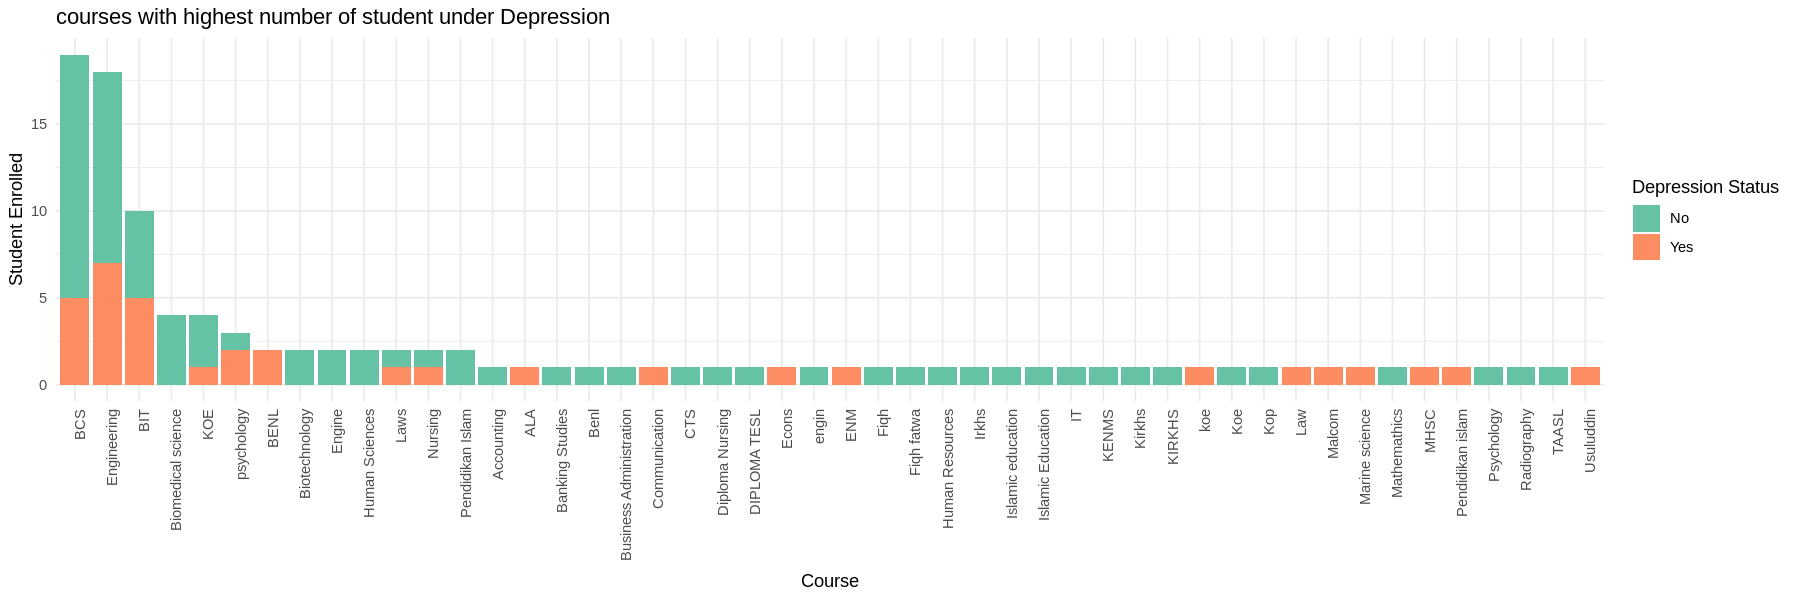

In [53]:
# Depression among students v/s the courses they are studying (Top 25 Courses)

data_depression <- df %>%
  group_by(Course) %>%
  summarise(No = sum(Depression == 0, na.rm = TRUE),
            Yes = sum(Depression == 1, na.rm = TRUE)) %>%
  arrange(desc(Yes)) %>%
  top_n(25, Yes)

# Print the summarized data
print(data_depression)

data_depression_long <- data_depression %>%
  pivot_longer(cols = c(No, Yes), names_to = "Depression_Status", values_to = "Count")

# Plot bar chart for Depression status by Course
ggplot(data_depression_long, aes(x = reorder(Course, -Count), y = Count, fill = Depression_Status)) +
  geom_bar(stat = "identity", position = "stack") +
  scale_fill_manual(name = "Depression Status", values = c("No" = "#66c2a5", "Yes" = "#fc8d62")) +
  ggtitle("courses with highest number of student under Depression ") +
  xlab("Course") +
  ylab("Student Enrolled") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

[1] "Students with Mental Health Issues: 64"
[1] "No Condition: 43"
[1] "One Condition: 36"
[1] "Two Conditions: 18"
[1] "Three Conditions: 10"


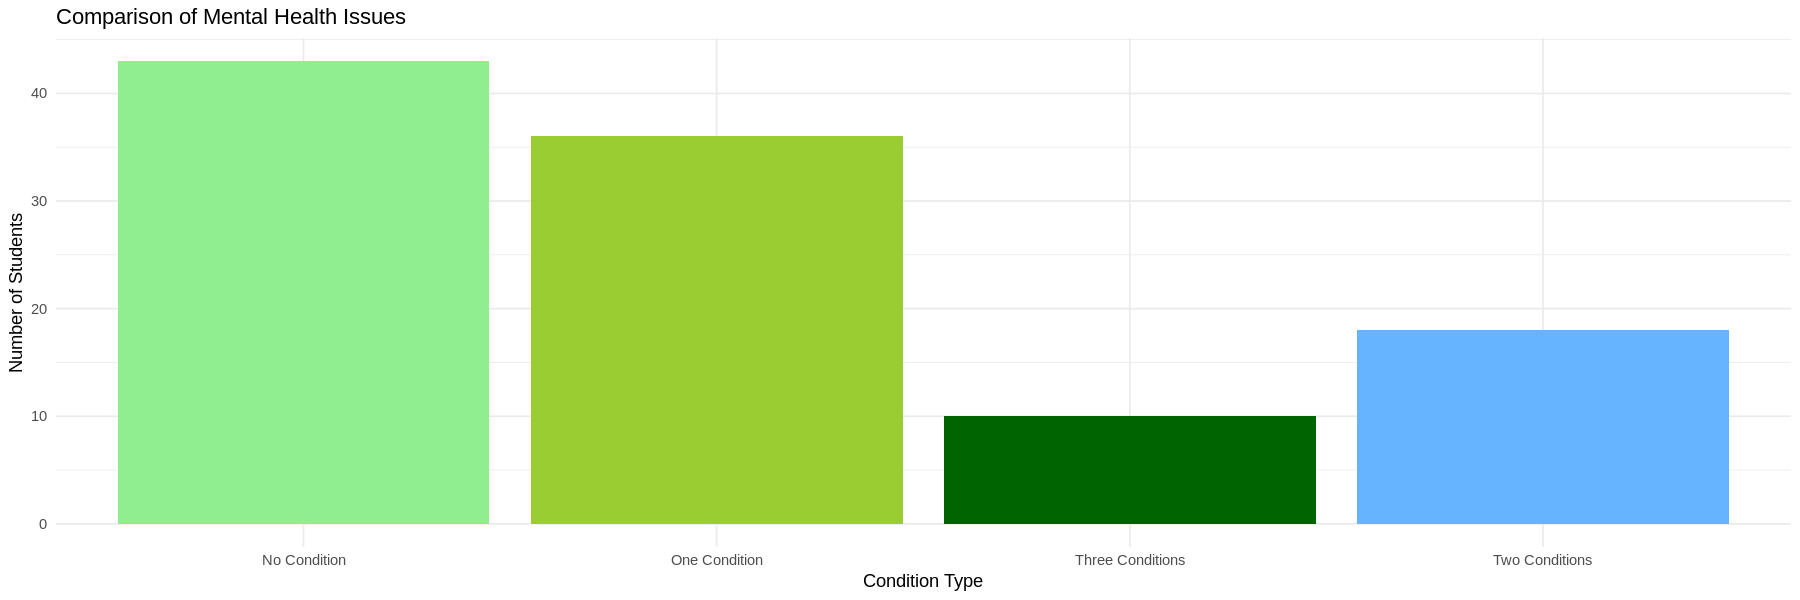

In [54]:
# Students with n-Mental health issues

df$Mental_Health <- df$Depression | df$Anxiety | df$Panic_Attack
mental_health_count <- sum(df$Mental_Health, na.rm = TRUE)

df$Condition_Count <- rowSums(df[, c('Depression', 'Anxiety', 'Panic_Attack')], na.rm = TRUE)

zero_condition_count <- sum(df$Condition_Count == 0, na.rm = TRUE)
one_condition_count <- sum(df$Condition_Count == 1, na.rm = TRUE)
two_conditions_count <- sum(df$Condition_Count == 2, na.rm = TRUE)
three_conditions_count <- sum(df$Condition_Count == 3, na.rm = TRUE)

three_condition_and_taking_special_care <-sum(df$Condition_Count == 3  & df$Specialist_Treatment=='Yes', na.rm = TRUE)
three_condition_and_nottaking_special_care <-sum(df$Condition_Count == 3  & df$Specialist_Treatment!='Yes', na.rm = TRUE)



print(paste("Students with Mental Health Issues:", mental_health_count))
print(paste("No Condition:", zero_condition_count))
print(paste("One Condition:", one_condition_count))
print(paste("Two Conditions:", two_conditions_count))
print(paste("Three Conditions:", three_conditions_count))


data <- data.frame(
  Category = c("No Condition", "One Condition", "Two Conditions", "Three Conditions"),
  Count = c(zero_condition_count, one_condition_count, two_conditions_count, three_conditions_count)
)

ggplot(data, aes(x = Category, y = Count, fill = Category)) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  labs(title = "Comparison of Mental Health Issues", x = "Condition Type", y = "Number of Students") +
  theme_minimal() +
  scale_fill_manual(values = c("lightgreen", "yellowgreen", "darkgreen", "#66B3FF"))


[1] "Three Conditions & taking care : 1"
[1] "Three Conditions & not taking care : 9"
[1] "Two Conditions & taking care: 5"
[1] "Two Conditions & not taking care: 13"
[1] "One Condition & taking care: 0"
[1] "One Condition & not taking care: 36"


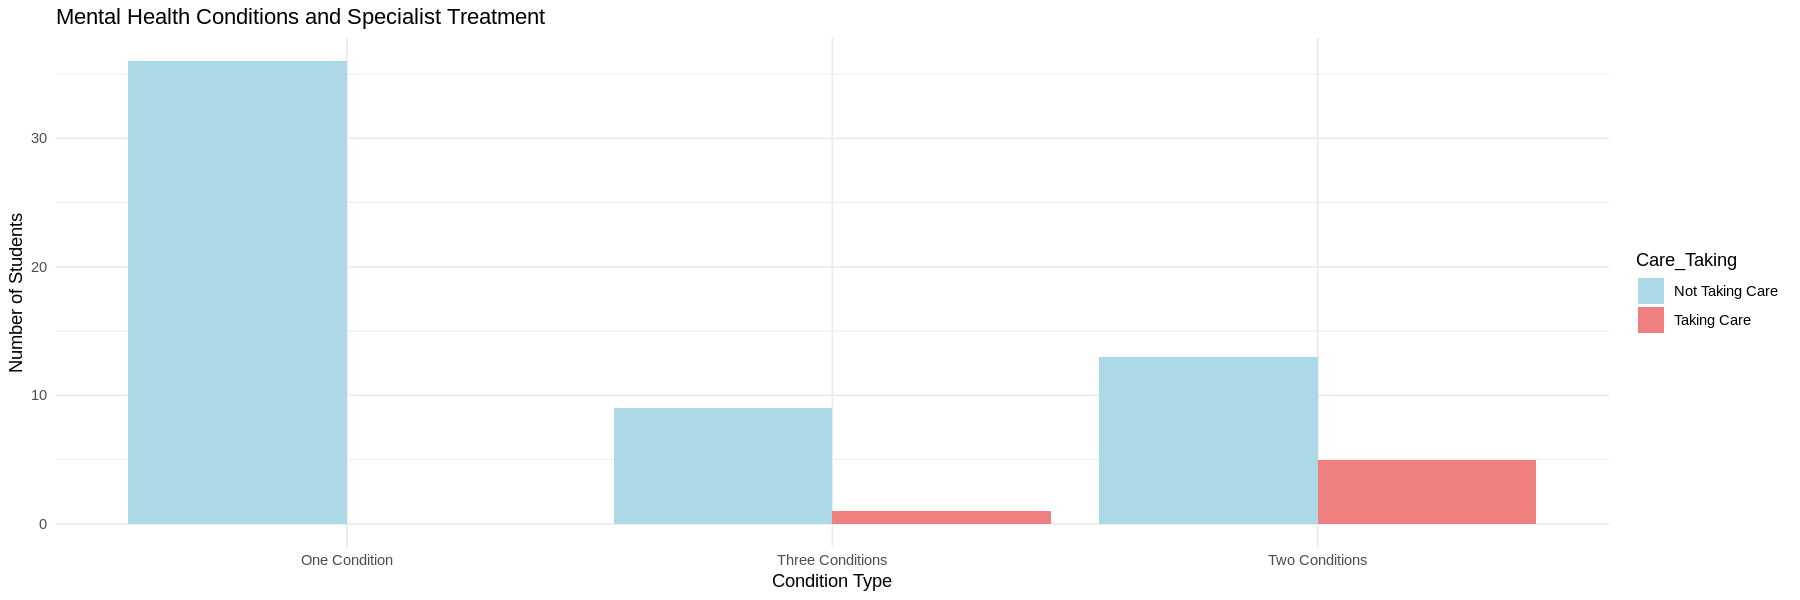

In [55]:
# Students with Mental health issues taking Specialist_Treatment or not

three_condition_and_taking_special_care <-sum(df$Condition_Count == 3  & df$Specialist_Treatment, na.rm = TRUE)
three_condition_and_nottaking_special_care <-sum(df$Condition_Count == 3  & !df$Specialist_Treatment, na.rm = TRUE)


print(paste("Three Conditions & taking care :", three_condition_and_taking_special_care))
print(paste("Three Conditions & not taking care :", three_condition_and_nottaking_special_care))

two_condition_and_taking_special_care <- sum(df$Condition_Count == 2 & df$Specialist_Treatment, na.rm = TRUE)
two_condition_and_nottaking_special_care <- sum(df$Condition_Count == 2 & !df$Specialist_Treatment, na.rm = TRUE)

one_condition_and_taking_special_care <- sum(df$Condition_Count == 1 & df$Specialist_Treatment , na.rm = TRUE)
one_condition_and_nottaking_special_care <- sum(df$Condition_Count == 1 & !df$Specialist_Treatment , na.rm = TRUE)

print(paste("Two Conditions & taking care:", two_condition_and_taking_special_care))
print(paste("Two Conditions & not taking care:", two_condition_and_nottaking_special_care))

print(paste("One Condition & taking care:", one_condition_and_taking_special_care))
print(paste("One Condition & not taking care:", one_condition_and_nottaking_special_care))

# Prepare the data
data <- data.frame(
  Condition = rep(c("One Condition", "Two Conditions", "Three Conditions"), each = 2),
  Care_Taking = rep(c("Taking Care", "Not Taking Care"), times = 3),
  Count = c(
    one_condition_and_taking_special_care, one_condition_and_nottaking_special_care,
    two_condition_and_taking_special_care, two_condition_and_nottaking_special_care,
    three_condition_and_taking_special_care, three_condition_and_nottaking_special_care
  )
)



ggplot(data, aes(x = Condition, y = Count, fill = Care_Taking)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Mental Health Conditions and Specialist Treatment",
       x = "Condition Type",
       y = "Number of Students") +
  scale_fill_manual(values = c("lightblue", "lightcoral")) +
  theme_minimal()


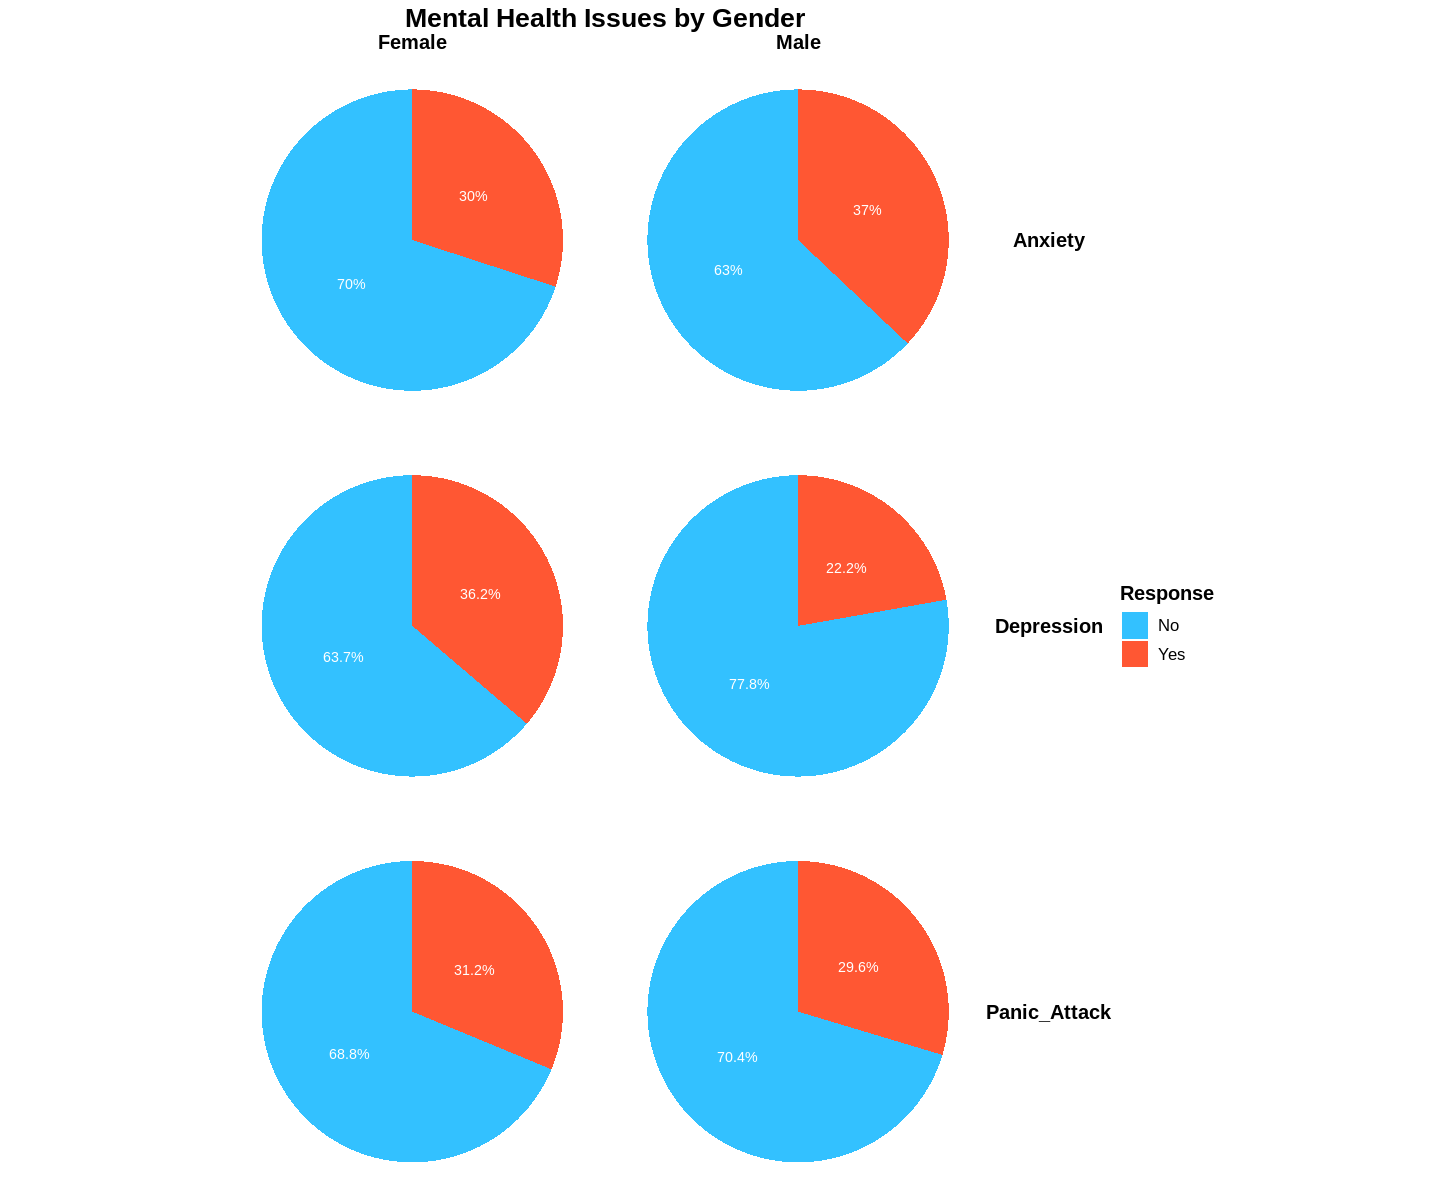

In [56]:
# Mental health issues in students of different gender

data_long <- df %>%
  pivot_longer(
    cols = c("Depression", "Anxiety", "Panic_Attack"),
    names_to = "Condition",
    values_to = "Response"
  )

data_long$Response <- as.factor(data_long$Response)

summary_data <- data_long %>%
  group_by(Sex, Condition, Response) %>%
  summarise(count = n(), .groups = 'drop') %>%
  group_by(Sex, Condition) %>%
  mutate(percentage = count / sum(count) * 100)

options(repr.plot.width = 12, repr.plot.height = 10)

pie_chart <- ggplot(summary_data, aes(x = "", y = percentage, fill = Response)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(theta = "y") +
  facet_grid(Condition ~ Sex) +
  labs(title = "Mental Health Issues by Gender",
       fill = "Response") +
  scale_fill_manual(values = setNames(c("#33C1FF", "#FF5733"), levels(data_long$Response)),
                    labels = c("0" = "No", "1" = "Yes")) +
  theme_void() +
  theme(strip.text = element_text(size = 12, face = "bold"),
        plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
        legend.title = element_text(size = 12, face = "bold"),
        legend.text = element_text(size = 10)) +
  geom_text(aes(label = paste0(round(percentage, 1), "%")),
            position = position_stack(vjust = 0.5), color = "white", size = 3)

print(pie_chart)


In [57]:
# Depression: ≈35% of students reported having depression.

# Anxiety: ≈30% reported anxiety.

# Panic Attacks: ≈25% experienced panic attacks.

# Treatment Seeking: Only ≈5% sought specialist treatment, despite many reporting mental health issues.